In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Shruti\Documents\advertising_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
missing_values = df.isnull().sum()
missing_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.size

800

In [8]:
df.shape

(200, 4)

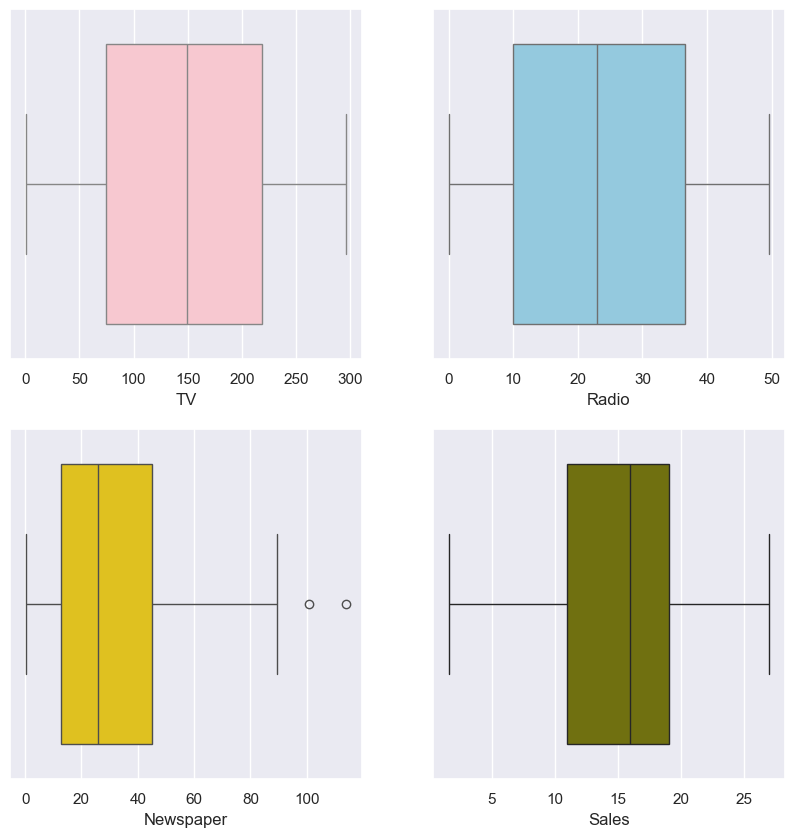

In [9]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(data=df, x="TV", color="Pink", ax=axs[0,0])
sns.boxplot(data=df, x="Radio", color="skyblue", ax=axs[0,1])
sns.boxplot(data=df, x="Newspaper", color="gold", ax=axs[1,0])
sns.boxplot(data=df, x="Sales", color="olive", ax=axs[1,1])
plt.show()

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

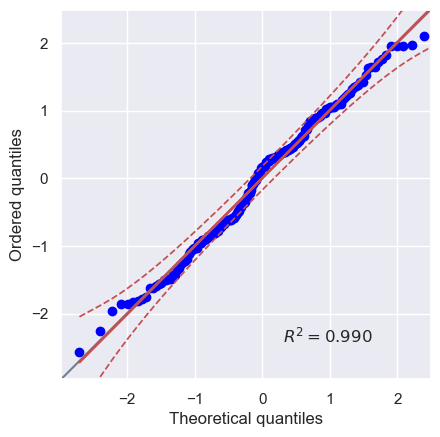

In [10]:
import pingouin as pg
pg.qqplot(df['Sales'], dist='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

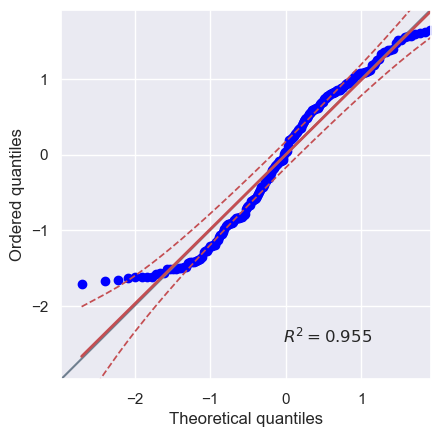

In [11]:
pg.qqplot(df['TV'], dist='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

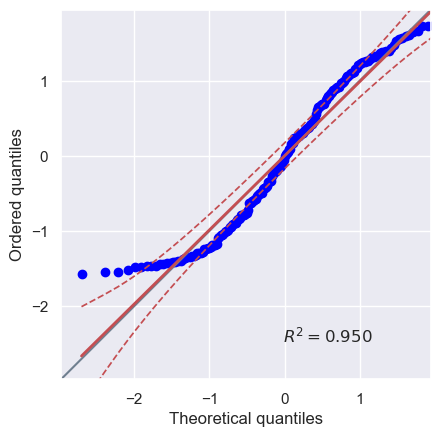

In [12]:
pg.qqplot(df['Radio'], dist='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

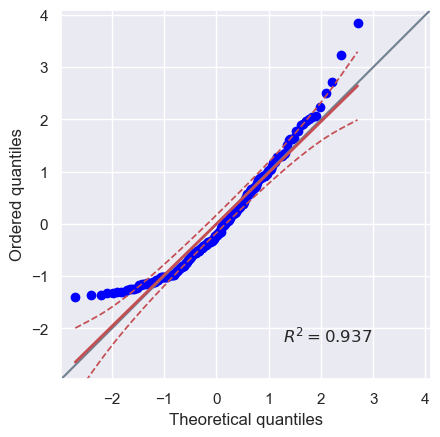

In [13]:
pg.qqplot(df['Newspaper'], dist='norm')

In [14]:
df.select_dtypes(include=['number']).columns.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

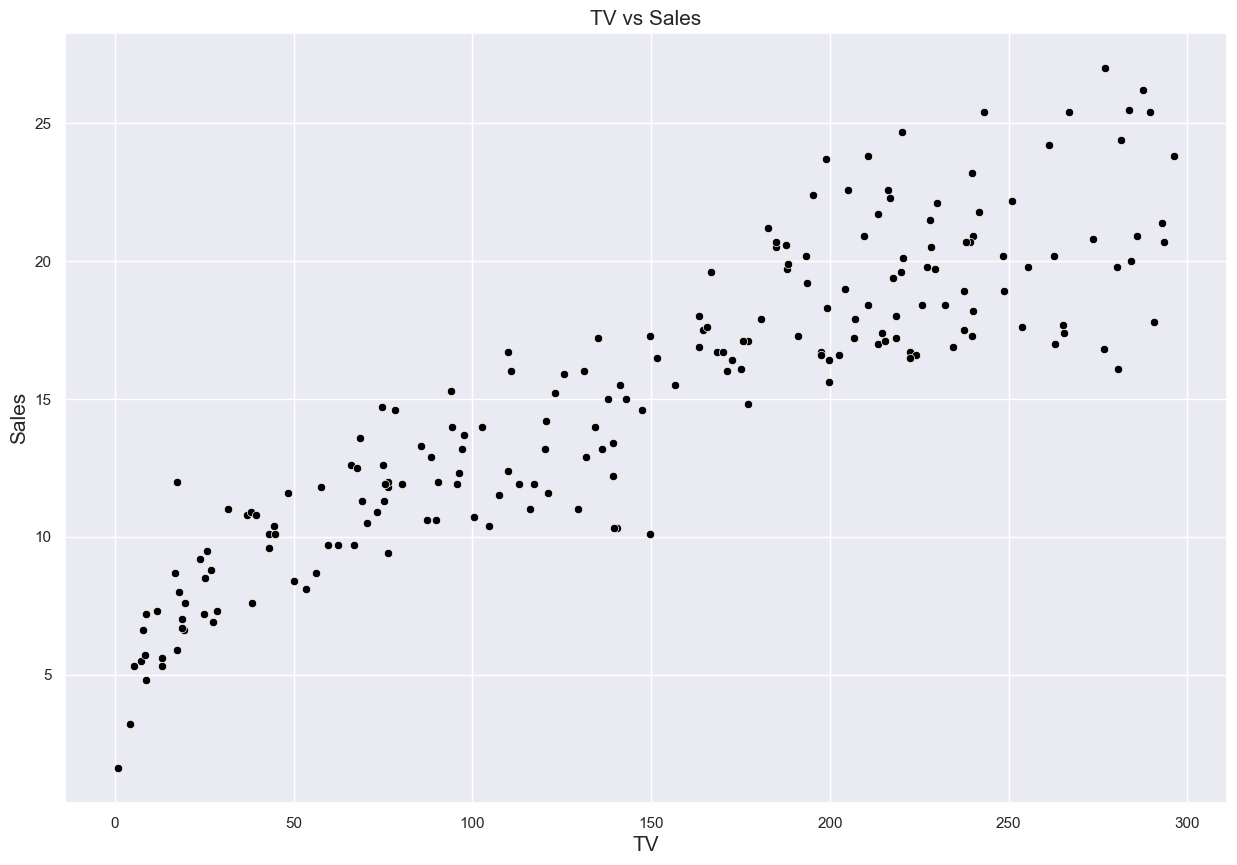

In [15]:
#scatter plot vs sales vs TV
#distribution of salary on the basis of TV

plt.figure(figsize=(15,10))
plt.xlabel('TV',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('TV vs Sales',fontsize=15)

sns.scatterplot(x=df['TV'],y=df['Sales'],color='black')
plt.show()

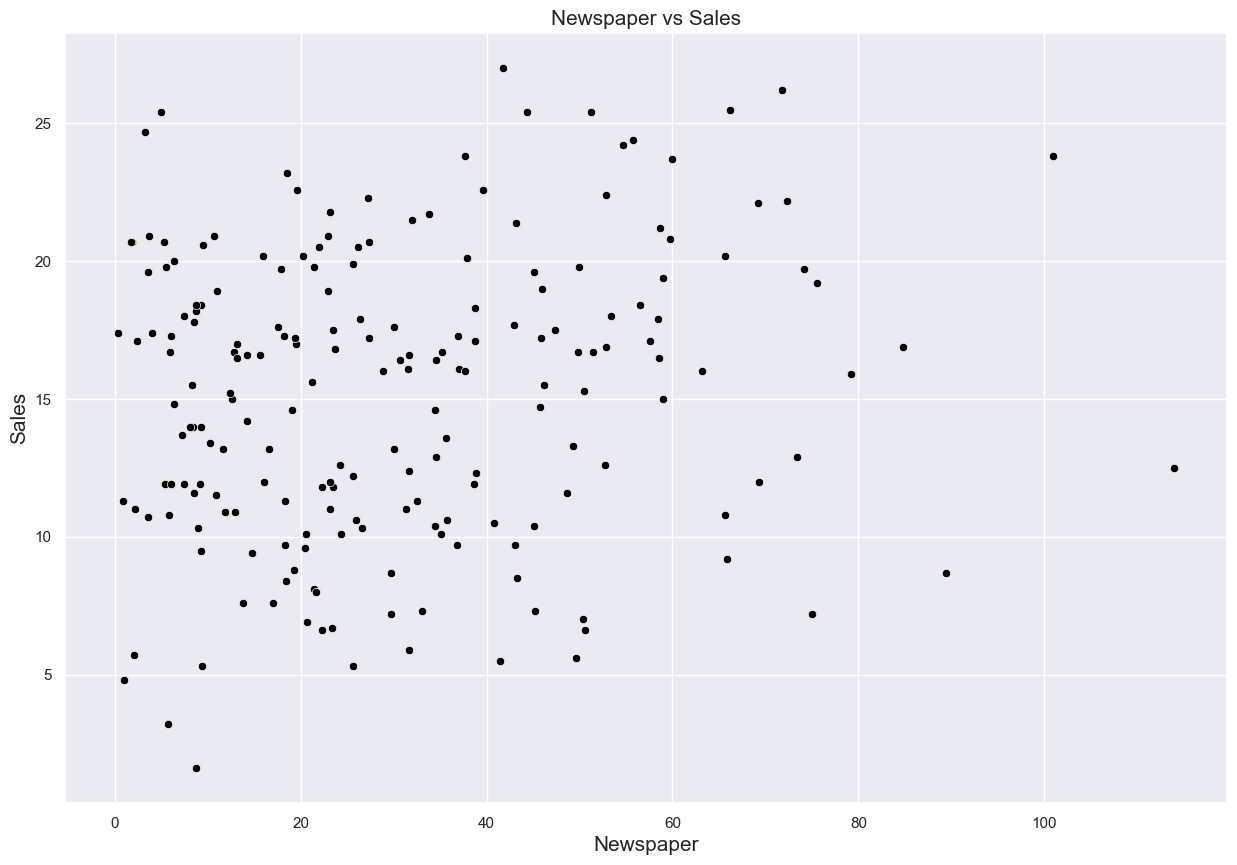

In [16]:
#scatter plot vs sales vs Newspaper
#distribution of salary on the basis of Newspaper

plt.figure(figsize=(15,10))
plt.xlabel('Newspaper',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Newspaper vs Sales',fontsize=15)

sns.scatterplot(x=df['Newspaper'],y=df['Sales'],color='black')
plt.show()

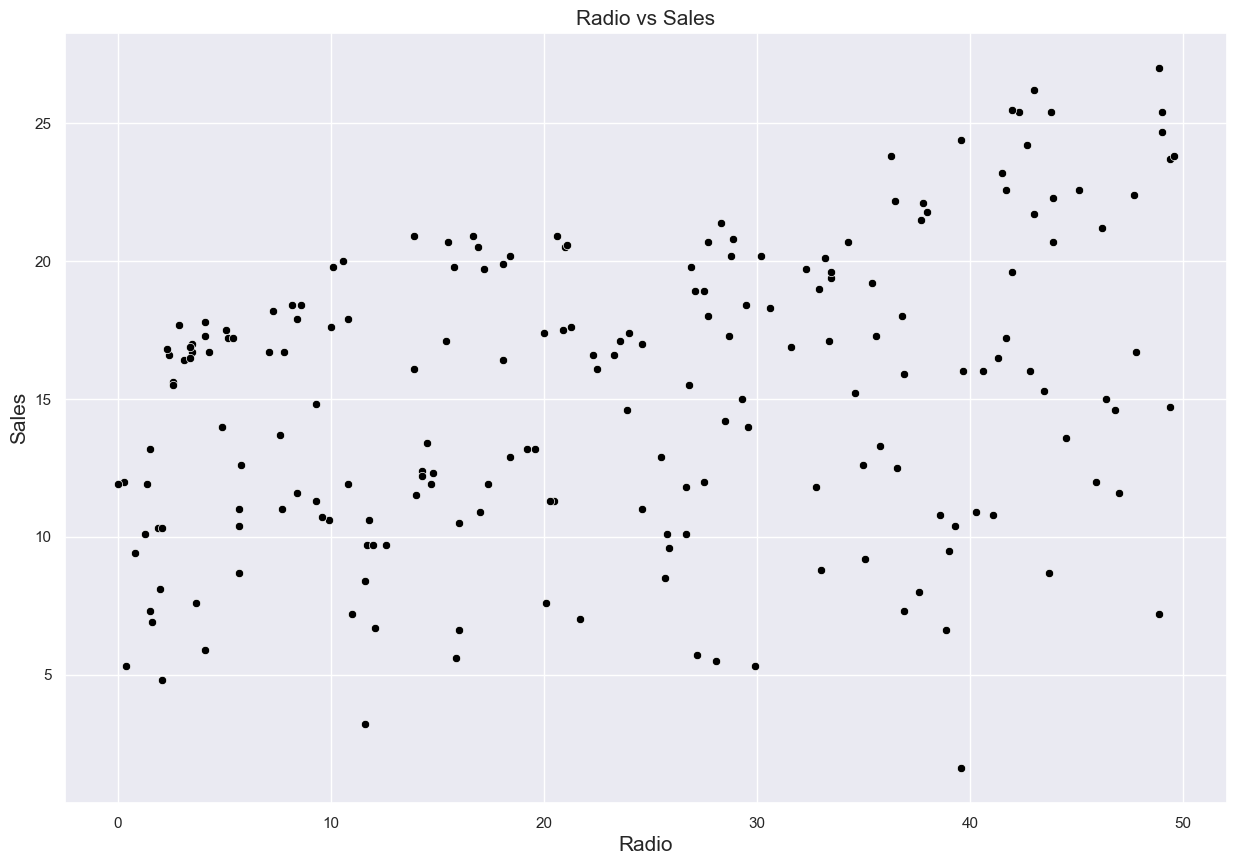

In [17]:
#scatter plot vs sales vs Radio
#distribution of salary on the basis of Radio

plt.figure(figsize=(15,10))
plt.xlabel('Radio',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Radio vs Sales',fontsize=15)

sns.scatterplot(x=df['Radio'],y=df['Sales'],color='black')
plt.show()

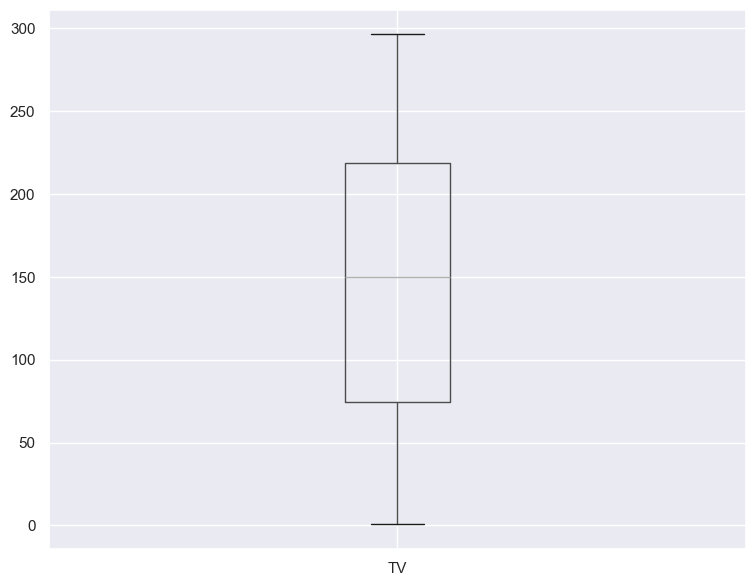

In [18]:
plt.figure(figsize=(9,7))
figure=df.boxplot(column="TV")

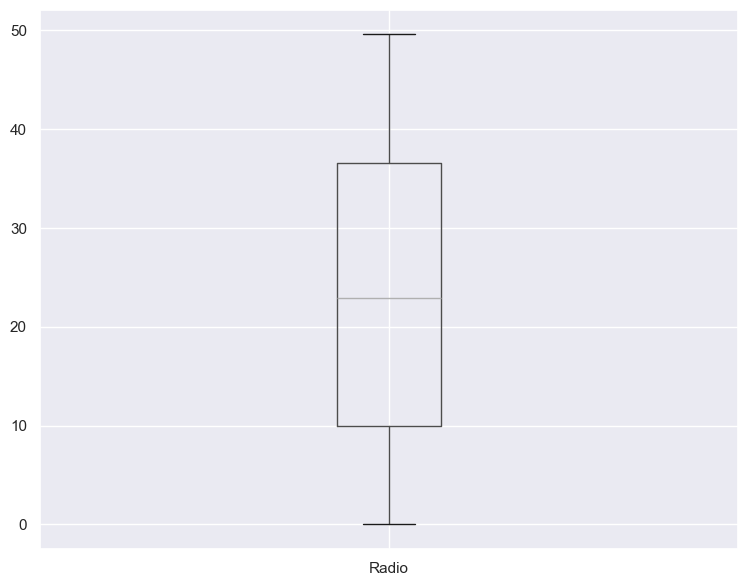

In [19]:
plt.figure(figsize=(9,7))
figure=df.boxplot(column="Radio")

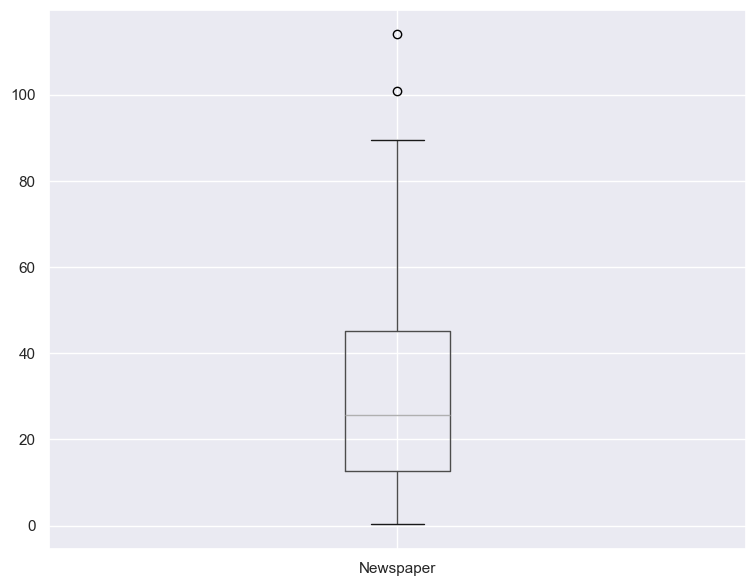

In [20]:
plt.figure(figsize=(9,7))
figure=df.boxplot(column="Newspaper")

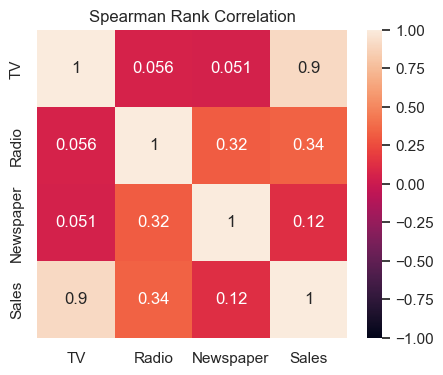

In [21]:
df_numeric = df.select_dtypes(include='number')

df_numeric.corr(method="spearman")
plt.figure(figsize=(5,4))

heatmap= sns.heatmap(df_numeric.corr(method = 'spearman').round(3), vmin=-1, vmax=1, annot=True)
plt.title("Spearman Rank Correlation")
plt.show()

In [22]:
Q1=df.quantile(0.25).round(3)
Q3=df.quantile(0.75).round(3)
IQR = Q3 - Q1
print(IQR)

TV           144.45
Radio         26.55
Newspaper     32.35
Sales          8.05
dtype: float64


In [23]:
dfout = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout.shape

(198, 4)

<Axes: xlabel='Newspaper'>

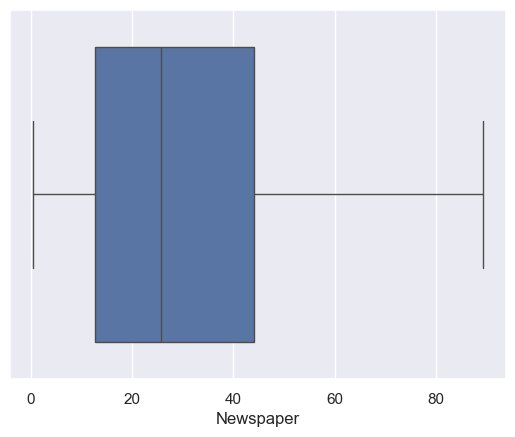

In [24]:
sns.boxplot(x=dfout['Newspaper'])

In [25]:
x = df.drop(['Sales'], axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
# dependent variable to y
y = df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [28]:
x_train

,TV,Radio,Newspaper
131,265.2,2.9,43.0
96,197.6,3.5,5.9
181,218.5,5.4,27.4
19,147.3,23.9,19.1
153,171.3,39.7,37.7
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [29]:
x_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [30]:
#data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

# fit scaler on trainin@c3gg5g data
x_train= sc.fit_transform(x_train)

#transform testing data
x_test = sc.transform(x_test)

In [31]:
x_train

array([[ 1.32803962, -1.33989652,  0.65846895],
       [ 0.52236742, -1.30050573, -1.13713546],
       [ 0.77145838, -1.17576822, -0.09655609],
       [-0.07711945,  0.03878117, -0.49826812],
       [ 0.20891802,  1.076072  ,  0.40195403],
       [ 0.7619238 ,  0.66903383,  1.4328536 ],
       [ 1.29824405,  0.36047263, -0.65314505],
       [ 0.11595584,  0.88568318, -1.0645369 ],
       [-0.63608434, -0.90003268, -1.24845325],
       [-0.92331363,  0.27512592, -0.64830515],
       [ 0.37100592,  1.35180754, -1.34041143],
       [-0.23205641, -1.20859388, -0.97257872],
       [ 1.42934456,  0.36703776,  1.46673293],
       [ 1.69988833,  0.85285752,  3.4607734 ],
       [-0.68614089, -0.55864583,  0.46003288],
       [-0.52405299,  1.60784768,  1.06502089],
       [ 1.21124099,  0.23573513, -1.15649508],
       [ 0.5998359 ,  0.62964304,  0.80366607],
       [ 1.0288921 , -0.43390832, -0.31435177],
       [ 0.47588633,  0.79377133,  2.23627768],
       [ 0.44489893,  0.3539075 , -0.541

In [32]:
y_train

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64

In [33]:
x_test

array([[-1.00793305e+00, -1.84433311e-01, -5.36987356e-01],
       [-1.23676302e+00, -7.68730046e-01, -5.32147452e-01],
       [-7.55266614e-01, -1.51058995e+00, -2.99832057e-01],
       [ 1.62003620e+00,  1.24676543e+00,  1.05534108e+00],
       [ 1.95807971e-01, -1.01820506e+00,  2.80956431e-01],
       [-1.16287001e+00, -1.15607283e+00,  1.47617074e-02],
       [-1.72898583e+00,  1.68006414e+00,  2.20723825e+00],
       [ 1.02889210e+00, -1.05103072e+00, -1.00161815e+00],
       [-1.54902059e+00,  7.74075939e-01,  1.76680698e+00],
       [ 5.22367415e-01, -6.09619386e-04, -7.35423423e-01],
       [ 1.28155853e+00,  1.27302596e+00,  1.22473772e+00],
       [-7.93404944e-01, -7.55599783e-01, -1.69154647e-01],
       [ 3.37200719e-02, -1.35959191e+00, -1.02097776e+00],
       [ 4.05568782e-01, -1.45042520e-01, -9.62898915e-01],
       [-9.22121805e-01,  2.22604864e-01, -3.43391194e-01],
       [-4.00103423e-01, -2.43519498e-01, -8.61260929e-01],
       [ 1.33280691e+00, -2.17258971e-01

In [34]:
y_test

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     20.5
149    10.1
24      9.7
30     21.4
160    16.4
40     16.6
56      5.5
Name: Sales, dtype: float64

In [35]:
x_train

array([[ 1.32803962, -1.33989652,  0.65846895],
       [ 0.52236742, -1.30050573, -1.13713546],
       [ 0.77145838, -1.17576822, -0.09655609],
       [-0.07711945,  0.03878117, -0.49826812],
       [ 0.20891802,  1.076072  ,  0.40195403],
       [ 0.7619238 ,  0.66903383,  1.4328536 ],
       [ 1.29824405,  0.36047263, -0.65314505],
       [ 0.11595584,  0.88568318, -1.0645369 ],
       [-0.63608434, -0.90003268, -1.24845325],
       [-0.92331363,  0.27512592, -0.64830515],
       [ 0.37100592,  1.35180754, -1.34041143],
       [-0.23205641, -1.20859388, -0.97257872],
       [ 1.42934456,  0.36703776,  1.46673293],
       [ 1.69988833,  0.85285752,  3.4607734 ],
       [-0.68614089, -0.55864583,  0.46003288],
       [-0.52405299,  1.60784768,  1.06502089],
       [ 1.21124099,  0.23573513, -1.15649508],
       [ 0.5998359 ,  0.62964304,  0.80366607],
       [ 1.0288921 , -0.43390832, -0.31435177],
       [ 0.47588633,  0.79377133,  2.23627768],
       [ 0.44489893,  0.3539075 , -0.541

In [36]:
x_test

array([[-1.00793305e+00, -1.84433311e-01, -5.36987356e-01],
       [-1.23676302e+00, -7.68730046e-01, -5.32147452e-01],
       [-7.55266614e-01, -1.51058995e+00, -2.99832057e-01],
       [ 1.62003620e+00,  1.24676543e+00,  1.05534108e+00],
       [ 1.95807971e-01, -1.01820506e+00,  2.80956431e-01],
       [-1.16287001e+00, -1.15607283e+00,  1.47617074e-02],
       [-1.72898583e+00,  1.68006414e+00,  2.20723825e+00],
       [ 1.02889210e+00, -1.05103072e+00, -1.00161815e+00],
       [-1.54902059e+00,  7.74075939e-01,  1.76680698e+00],
       [ 5.22367415e-01, -6.09619386e-04, -7.35423423e-01],
       [ 1.28155853e+00,  1.27302596e+00,  1.22473772e+00],
       [-7.93404944e-01, -7.55599783e-01, -1.69154647e-01],
       [ 3.37200719e-02, -1.35959191e+00, -1.02097776e+00],
       [ 4.05568782e-01, -1.45042520e-01, -9.62898915e-01],
       [-9.22121805e-01,  2.22604864e-01, -3.43391194e-01],
       [-4.00103423e-01, -2.43519498e-01, -8.61260929e-01],
       [ 1.33280691e+00, -2.17258971e-01

In [37]:
#data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

# fit scaler on trainin@c3gg5g data
x_train= sc.fit_transform(x_train)

#transform testing data
x_test = sc.transform(x_test)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Create and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

# Make predictions
y_pred_lr = model_lr.predict(x_test)

# Calculate performance metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / np.abs(y_test)))
accuracy_lr = 100 * (1- mape_lr)

# Print the performance metrics for Linear Regression
print('Linear Regression Metrcs:')
print('Mean Absolute Error (MAE):', mae_lr)
print('Mean Squared Error (MSE):', mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print('Mean Absolute Percentage Erro (MAPE):', round(mape_lr * 100, 2))
print('Accuracy:', round(accuracy_lr, 2))

Linear Regression Metrcs:
Mean Absolute Error (MAE): 1.3662313868452756
Mean Squared Error (MSE): 3.9380152204802834
Root Mean Squared Error (RMSE): 1.984443302410095
Mean Absolute Percentage Erro (MAPE): 17.22
Accuracy: 82.78


In [39]:
from sklearn.tree import DecisionTreeRegressor
# Create and train the DecisionTree
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

#Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
accuracy = 100*(1-mape)

# Print the performance metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(accuracy, 2))


Mean Absolute Error (MAE): 1.298333333333333
Mean Squared Error (MSE): 4.0305
Root Mean Squared Error (RMSE): 2.007610519996346
Mean absolute Percentage Error (MAPE): 18.94
Accuracy: 81.06


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

# Make Predictions
y_pred_rf = model_rf.predict(x_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / np.abs(y_test)))
accuracy_rf = 100 * (1 - mape_rf)

#Print the performance metrics for Random Forest
print('Random Forest Metrics:')
print('Mean Absolute Error (MAE):', mae_rf)
print('Mean Squared Error (MSE):', mse_rf)
print('Root Mean Squared Error (RMSE):', rmse_rf)
print('Mean Absolute Percentage Error (MAPE):', round(mape_rf * 100,2))
print('Accuracy:', round(accuracy_rf, 2))

Random Forest Metrics:
Mean Absolute Error (MAE): 1.1309833333333337
Mean Squared Error (MSE): 2.4612911833333366
Root Mean Squared Error (RMSE): 1.5688502743516783
Mean Absolute Percentage Error (MAPE): 14.35
Accuracy: 85.65


In [41]:
import xgboost as xgb
# Create and train the XGBoost model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(x_test)

#Calculate performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / np.abs(y_test)))
accuracy_xgb = 100 * (1- mape_xgb)

print('XGBoost Metrics:')
print('Mean Absolute Error (MAE):', mae_xgb)
print('Mean Squared Error (MSE):', mse_xgb)
print('Root Mean Squared Error (RMSE):', rmse_xgb)
print('Mean Absolute Percentage Error (MAPE):', round(mape_xgb * 100, 2))
print('Accuracy:', round(accuracy_xgb, 2))

XGBoost Metrics:
Mean Absolute Error (MAE): 1.2835482501983644
Mean Squared Error (MSE): 3.4386680767975553
Root Mean Squared Error (RMSE): 1.8543646019048021
Mean Absolute Percentage Error (MAPE): 17.23
Accuracy: 82.77


In [42]:
# Cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=LinearRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:", np.mean(results))

[0.89697129 0.91485147 0.90005459 0.92098498 0.89075363 0.88053857
 0.87831843 0.90308232 0.92663975 0.87972149]

Mean Cross-validation Accuracy: 0.8991916529169701


In [43]:
model = DecisionTreeRegressor(max_depth=3)
ssplit = ShuffleSplit(n_splits = 10, test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:", np.mean(results))

[0.7776626  0.86740573 0.87421937 0.88655996 0.86178461 0.89966338
 0.88145117 0.82804763 0.84235049 0.86214546]

Mean Cross-validation Accuracy: 0.8581290411291637


In [44]:
# Cross validation for our model
model=RandomForestRegressor(random_state=5)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[0.93243571 0.92806001 0.95942889 0.93482794 0.94354239 0.94926596
 0.95495483 0.94871453 0.96103406 0.9234479 ]

Mean Cross-validation Accuracy: 0.9435712205744323


In [45]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define ShuffleSplit cross-validation
ssplit = ShuffleSplit(n_splits=10, test_size=0.3)

# Perform cross-validation
results_xgb = cross_val_score(model_xgb, x, y, cv=ssplit)

# Print results for each fold
print("Cross-validation results for each fold:")
print(results_xgb)

# Print mean accuracy across all folds
print("\nMean Cross-validation Accuracy:", np.mean(results_xgb))


Cross-validation results for each fold:
[0.94996813 0.93872628 0.95181445 0.87134922 0.93632155 0.94109676
 0.94857929 0.92100963 0.90505369 0.92053842]

Mean Cross-validation Accuracy: 0.9284457405332629
